In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.max_column", 500)

In [2]:
raw = pd.read_excel("/kaggle/input/summit-biotech-attrition-2021/Dataset_-_Summit_Biotech_Attrition_2021.xlsx",sheet_name="Attrition Dataset")

In [3]:
raw.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,1,1,2,Female,3,2,Sales Executive,4,Single,6592.3,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,1,2,3,Male,2,2,Research Scientist,2,Married,5643.0,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,Other,1,4,4,Male,2,1,Laboratory Technician,3,Single,2299.0,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,1,5,4,Female,3,1,Research Scientist,3,Married,3199.9,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Medical,1,7,1,Male,3,1,Laboratory Technician,2,Married,3814.8,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   EducationField            1470 non-null   object 
 6   EmployeeCount             1470 non-null   int64  
 7   EmployeeNumber            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  JobInvolvement            1470 non-null   int64  
 11  JobLevel                  1470 non-null   int64  
 12  JobRole                   1470 non-null   object 
 13  JobSatisfaction           1470 non-null   int64  
 14  MaritalS

### Missing Values

In [5]:
raw.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Duplicated Value

In [6]:
raw.duplicated().sum()

0

### Percent Employee in each Dept

In [7]:
px.pie(data_frame=raw, names=raw.Department.unique(),values=raw.Department.value_counts())

### Attrition Rate by Department Compared with Industry

In [8]:
dept_att = pd.pivot_table(data=raw, index="Department", columns="Attrition", values="EmployeeCount", aggfunc=np.sum)

In [9]:
dept_att["Yes Perc"] = dept_att.Yes/(dept_att.Yes + dept_att.No)*100
dept_att["No Perc"] = 100 - dept_att["Yes Perc"]

In [10]:
dept_att

Attrition,No,Yes,Yes Perc,No Perc
Department,,,,
Human Resources,51,12,19.047619,80.952381
Research & Development,828,133,13.839750,86.160250
Sales,354,92,20.627803,79.372197


In [11]:
industry_att_dept = pd.DataFrame(columns=["Yes Perc"], index=raw.Department.unique(), data = [15, 15, 20])

In [12]:
industry_att_dept["No Perc"] = 100 - industry_att_dept["Yes Perc"]

In [13]:
industry_att_dept.index.rename("Department", inplace=True)

In [14]:
industry_att_dept

,Yes Perc,No Perc
Department,,
Sales,15,85
Research & Development,15,85
Human Resources,20,80


In [15]:
dept_att_compare = dept_att.merge(industry_att_dept, how="inner", on="Department",suffixes=["_summit", "_industry"])

In [16]:
dept_att_compare

,No,Yes,Yes Perc_summit,No Perc_summit,Yes Perc_industry,No Perc_industry
Department,,,,,,
Human Resources,51,12,19.047619,80.952381,20,80
Research & Development,828,133,13.839750,86.160250,15,85
Sales,354,92,20.627803,79.372197,15,85


In [17]:
px.bar(data_frame=dept_att_compare[["Yes Perc_industry", "Yes Perc_summit"]], barmode="group")

#### Notes:
- Only ```Sales``` Dept at Biotech has higher attrition rate than the industry

### Attrition by Role

In [18]:
industry_attrition_by_role = pd.Series({"Sales Executives": 19,
           "Research Scientist": 18,
           "Laboratory Technician": 22,
           "Manufacturing Director": 6,
           "Healthcare Representative": 6,
           "Manager": 5,
           "Sales Representative": 31,
           "Research Director":4,
           "Human Resources": 24}, name='Attrition').to_frame()
        

In [19]:
industry_attrition_by_role.rename(columns={"Attrition":"Yes Perc"}, inplace=True)

In [20]:
industry_attrition_by_role.index.rename("JobRole", inplace=True)

In [21]:
role_att = pd.pivot_table(data=raw, index="JobRole", columns="Attrition", values="EmployeeCount", aggfunc=np.sum)

In [22]:
role_att.rename(columns={"Yes": "Yes Perc", "No": "No Perc"}, inplace=True)

In [23]:
role_att["Yes"] = role_att["Yes Perc"] / (role_att["Yes Perc"] + role_att["No Perc"])*100

In [24]:
role_att["No"]=100-role_att.Yes

In [25]:
role_att.drop(columns=["No Perc", "Yes Perc"], inplace=True)

In [26]:
role_att.rename(columns={"Yes": "Yes Perc", "No": "No Perc"}, inplace=True)

In [27]:
role_att_compare = industry_attrition_by_role.merge(role_att, on="JobRole", how='inner', suffixes=["_industry", "_summit"])

In [28]:
role_att_compare

,Yes Perc_industry,Yes Perc_summit,No Perc
JobRole,,,
Research Scientist,18,16.095890,83.904110
Laboratory Technician,22,23.938224,76.061776
Manufacturing Director,6,6.896552,93.103448
Healthcare Representative,6,6.870229,93.129771
Manager,5,4.901961,95.098039
Sales Representative,31,39.759036,60.240964
Research Director,4,2.500000,97.500000
Human Resources,24,23.076923,76.923077


In [29]:
px.bar(data_frame=role_att_compare, x=["Yes Perc_industry","Yes Perc_summit"],barmode="group", labels={"JobRole": "Job Role", "value": "Percent Employee"})

#### Notes:
- ```Sales Rep```'s attrition rate in Biotech was remarkably higher than the industry
- ```Lab Technician```, ```Healthcare Rep``` and ```Manufacturing Director``` has the relatively high attrition rate compared to the whole industry

### Average Attrition Rate

In [30]:
avg_attrition = raw.Department.where(raw.Attrition=="Yes").count()/raw.Department.count()*100

In [31]:
f"Average Attrition Rate: {avg_attrition:.2f}%"

'Average Attrition Rate: 16.12%'

### Average Employee Distance from Home

In [32]:
raw.DistanceFromHome.describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [33]:
print(f"Average Distance from Home: {raw.DistanceFromHome.mean():.2f}%")

Average Distance from Home: 9.19%


### Average HR-to-Employee Ratio

In [34]:
HR_ratio = raw.JobRole[raw.JobRole=="Human Resources"].count()/raw.JobRole.count()*100

In [35]:
raw.groupby('Department').JobRole.unique()

Department
Human Resources                                  [Human Resources, Manager]
Research & Development    [Research Scientist, Laboratory Technician, Ma...
Sales                      [Sales Executive, Manager, Sales Representative]
Name: JobRole, dtype: object

In [36]:
raw.groupby('Department').JobRole.unique()[0]

array(['Human Resources', 'Manager'], dtype=object)

In [37]:
print(f"Average HR-to-Employeee Ratio: {HR_ratio:.2f}%")

Average HR-to-Employeee Ratio: 3.54%


### Average % Employee Working OT

In [38]:
percent_OT = raw.OverTime[raw.OverTime=="Yes"].count()/raw.OverTime.count()*100

In [39]:
print(f"Average % Employee Working OT: {percent_OT:.2f}%")

Average % Employee Working OT: 28.30%


### Insights into Why Facing High Turnover Rate:

The increase in turnover is partially due to the following:
- For Summit Biotech, the number of forced layoffs was minimal.
- Employees are compelled to stay with their current employer as they appreciated the job security. This was inly true for specific industries and during Covid's peak (in 2020 to the mid 2021). This analysis was conducted at the end of 2021. 
- Work can be done from anywhere ---> Return to office policy have been playing an important role in employees' decision whether to leave.


Some factors that can contribute to the increase in attrition rate:
- Disadvantage Factors: ```DistanceFromHome```, ```BusinessTravel```, ```OverTime```
- Compensation: ```MonthlyIncome```, ```JobLevel```, ```StockOptionLevel```, ```PercentSalaryHike```
- Satisfaction: ```EnvironmentSatisfaction```, ```JobSatisfaction```, ```RelationshipSatisfaction```
- Other ratings: ```JobInvolvement```, ```PerformanceRating```, ```WorkLifeBalance```
- Working Status:  ```Department```, ```JobRole```. ```TrainingTimesLastYear```, ```YearsAtCompany```, ```YearsInCurrentRole```, ```YearsSinceLastPromotion```, ```YearsWithCurrManager```
- Work History: ```NumCompaniesWorked```, ```TotalWorkingYears```
- Personal Profile: ```Age```, ```EducationField```. ```Gender```, ```MaritalStatus```

### Return to Office Policy
- The company believed that all employees would have to return to the office based on their eligibility outlined in the 3-phase approach

---> Is the manager the one to whom employee can easily be talking with? (Because "if you are hesitant about returning to the office, please speak with your manager as soon as possible")

- "Those that are under the age of 60 without increased risk for serious illness are asked to return on July 2021" ---> Basically, almost all people were back to work right in phase 1 (only 5 people were 60)

---> Phase 1 and phase 2 are not really different in terms of the number of employees back to work

#### Notes:
- There is the lack of information regarding wether working from home was what employees want to. Howeever, based on the attrition rate, it would infer that working from home was more favorable by employees. 
- The reason why people preferred working from home maybe because they felt more flexible, more comfortable and more effective compared to the conventional working style. Or it could be because they would still be afraid of the negative effect of COVID on their health.  

---> Need more survey about whether people prefer working from home and the reason why that is the case

### Reviews from Former Employees
- Lab Technician: Back-to-work policy didn't align with her personal priorities (Female, 25)
--- 
- Research Director: Have to be open and flexible in order to thrive (2018, Female, 42)

---
- Research Scientist: Back-to-work policy (Male, 31)
- ***Contradict***: Management is approachable and transparent ---> Maybe because different roles have different managers?
---
- Executive Assistant: Close-minded management that wont't listen to your ideas + hierachy is very deliberate. (Male, 28)
---
- Sales Representative x4: ***Salaries for non-managers*** are far below market + Emplotees are ***not allowed to discuss their pay*** + ***Stock options*** are offered but this doesn't make up for the gap + Vacations can be difficult to book (Male, 31)+ Employees are often expected to ***Work Overtime*** without receiving enough compensation + A Lack of transparency (**answer to employee's questions are often vague*** - especially during COVID) + ***Feel forced to return to the office*** when working remotely helped mitigate ***micromanagement*** (Female, 22) + ***The pay isn't bad, but it's not great either*** + ***Felt undervalued*** at times, especially during COVID + Love working remotely + ***Lack of training and emphasis on personal development*** (Male, 23)
- ***Contradict***: Felt isolated in this role ---> Maybe because of the lack of connection and guidance from manager?

#### Questions:
- Whether different roles have different managers?
- Non-managers and managers role?

#### Strategy:
- Adjust the back-to-office policy: Which job roles can be done more productively at home (Sales Rep), which one requires working at the office (Lab Technician, Scientist)
- Adjust the training plan (emphasis on personal development/career, more training)
- Improve the relationship between managers and employees (clear communication, no hierachy - more open-minded - seek to understand, mitigate micromanagement)
- Salaries for non-management roles - Compensate for working overtime (PercentHikeSalary, StockOptions, MonthlyIncome, JobLevel, etc.)

### Finding The Reviewer Status

#### Sales Rep - Male 25 - Rating 1/5 
#### Problems: Salaries - Stock Options 


In [40]:
raw[(raw.Gender == "Male") & (raw.JobRole == "Sales Representative") & (raw.Age == 25)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
478,25,No,Travel_Rarely,Sales,13,Medical,1,645,2,Male,3,1,Sales Representative,3,Married,2305.6,1,Y,No,11,3,3,0,7,1,3,7,4,0,6
683,25,Yes,Travel_Rarely,Sales,19,Marketing,1,952,3,Male,2,1,Sales Representative,2,Married,2654.3,1,Y,Yes,18,3,3,3,1,2,3,1,0,0,0
911,25,Yes,Travel_Frequently,Sales,24,Life Sciences,1,1273,3,Male,1,1,Sales Representative,4,Single,1229.8,1,Y,Yes,14,3,4,0,1,4,3,1,0,1,0
1021,25,Yes,Travel_Rarely,Sales,9,Life Sciences,1,1439,1,Male,2,1,Sales Representative,1,Married,4840.0,3,Y,No,12,3,1,0,6,2,3,3,2,2,2


#### Research Scientist - Male 31 - Rating 5/5
#### Problem: Return-to-office policy (Have been in the Office the whole time so it didn't impact me)

In [41]:
raw[(raw.Gender == "Male") & (raw.JobRole == "Research Scientist") & (raw.Age == 31)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
12,31,No,Travel_Rarely,Research & Development,26,Life Sciences,1,16,1,Male,3,1,Research Scientist,3,Divorced,3202.1,1,Y,No,17,3,4,1,5,1,2,5,2,4,3
72,31,No,Travel_Rarely,Research & Development,1,Medical,1,95,3,Male,3,1,Research Scientist,2,Single,2751.1,1,Y,No,17,3,2,0,1,4,3,1,1,1,0
309,31,No,Travel_Rarely,Research & Development,5,Technical Degree,1,423,3,Male,3,1,Research Scientist,4,Married,5303.1,0,Y,Yes,12,3,3,1,6,4,3,5,2,0,3
312,31,No,Travel_Rarely,Research & Development,2,Life Sciences,1,426,3,Male,3,1,Research Scientist,4,Divorced,2964.5,0,Y,Yes,18,3,2,1,3,2,1,2,2,2,2
369,31,No,Travel_Rarely,Research & Development,9,Life Sciences,1,493,3,Male,2,1,Research Scientist,2,Single,2922.7,0,Y,Yes,16,3,4,0,3,5,3,2,2,2,2
644,31,No,Travel_Rarely,Research & Development,11,Life Sciences,1,895,4,Male,3,1,Research Scientist,4,Married,2591.6,3,Y,Yes,19,3,2,1,8,2,3,6,4,0,2
709,31,Yes,Non-Travel,Research & Development,9,Medical,1,991,3,Male,2,1,Research Scientist,1,Single,2553.1,0,Y,Yes,22,4,1,0,4,0,3,3,2,1,2
1382,31,No,Non-Travel,Research & Development,3,Medical,1,1948,3,Male,3,1,Research Scientist,1,Divorced,3371.5,1,Y,Yes,13,3,4,1,4,3,4,4,2,2,3
1389,31,No,Travel_Frequently,Research & Development,1,Life Sciences,1,1956,4,Male,1,2,Research Scientist,1,Married,5503.3,1,Y,No,21,4,2,0,10,6,3,10,8,8,7


#### Sales Rep - Male 23 - Rating 2/5
#### Problems: Felt under supported/ isolated in my role - Lack of training and emphasis on personal development

In [42]:
raw[(raw.Gender == "Male") & (raw.JobRole == "Sales Representative") & (raw.Age == 23)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
86,23,No,Travel_Rarely,Sales,2,Technical Degree,1,113,3,Male,3,1,Sales Representative,1,Divorced,2554.2,3,Y,No,13,3,3,1,3,3,3,0,0,0,0
1213,23,Yes,Travel_Rarely,Sales,7,Life Sciences,1,1702,3,Male,3,1,Sales Representative,4,Divorced,2502.5,1,Y,Yes,21,4,2,1,3,2,3,3,2,0,2
1438,23,Yes,Travel_Frequently,Sales,9,Marketing,1,2023,4,Male,3,1,Sales Representative,1,Married,1969.0,1,Y,No,19,3,1,1,1,3,2,1,0,1,0


#### Conclusion:
- Many of the reviewers can not be found in the dataset
- There is a person who was not working here since 2019 and she was not listed in the dataset, which makes sense because this is the employee dataset for 2021 
- However, there are many reviewers who were still doing the review in the beginning of 2021 but they can not be found. 

---> ***One assumption is the date they reviewed does not reflect whether they still working in Summit Biotech at that time.***
----> If this is the case, ***those reviews cannot reflect exactly what was going on in the company at that present moment***. Maybe they left the company in Sep 2020 but they were asked for reviewing in Jan 2021 and ***maybe the company made some major changes in ```compensation```, ```relationship with managers``` and so on*** 

---> Can we trust what we found here? What if those reviewers are not in our dataset but we found someone with the same demographics?
---> The way to make those survey have much more sense is to assumme that they were not changing much between the time when the interviee left and when they were asked for a review. 
---> It is unconfident to tell wether those interviewees are listed in the dataset. It is safe when we do not do any analysis to compare the interview with the status of the seeeingly true employees we found

***---> Based on the reviews, with assumption that nothing changed much since they left reviewers left the company, we can still draw some insights from the dataset***

### Training Last Year

In [43]:
raw.groupby(["JobRole", "Attrition"]).TrainingTimesLastYear.describe()

count      mean       std  min   25%  \
JobRole                   Attrition                                         
Healthcare Representative No         122.0  2.786885  1.392005  0.0  2.00   
                          Yes          9.0  2.222222  0.833333  1.0  2.00   
Human Resources           No          40.0  2.700000  1.159133  1.0  2.00   
                          Yes         12.0  2.083333  1.240112  0.0  1.75   
Laboratory Technician     No         197.0  3.040609  1.300854  0.0  2.00   
                          Yes         62.0  2.661290  1.266770  0.0  2.00   
Manager                   No          97.0  2.845361  1.219120  0.0  2.00   
                          Yes          5.0  2.200000  0.447214  2.0  2.00   
Manufacturing Director    No         135.0  2.755556  1.390086  0.0  2.00   
                          Yes         10.0  2.600000  1.505545  0.0  2.00   
Research Director         No          78.0  2.820513  1.214026  0.0  2.00   
                          Yes          2.0  1.000000  1.414214  0.0  0.50   
Research Scientist        No         245.0  2.665306  1.281257  0.0  2.00   
                          Yes         47.0  2.659574  1.273076  0.0  2.00   
Sales Executive           No         269.0  2.869888  1.276139  0.0  2.00   
                          Yes         57.0  2.649123  1.342854  0.0  2.00   
Sales Representative      No          50.0  3.060000  1.202209  1.0  2.00   
                          Yes         33.0  2.939394  1.087985  0.0  2.00   

                                     50%   75%  max  
JobRole                   Attrition                  
Healthcare Representative No         3.0  3.00  6.0  
                          Yes        2.0  2.00  4.0  
Human Resources           No         2.5  3.00  6.0  
                          Yes        2.0  3.00  4.0  
Laboratory Technician     No         3.0  4.00  6.0  
                          Yes        2.0  3.00  6.0  
Manager                   No         3.0  3.00  6.0  
                          Yes        2.0  2.00  3.0  
Manufacturing Director    No         2.0  3.00  6.0  
                          Yes        2.5  3.75  5.0  
Research Director         No         3.0  3.00  6.0  
                          Yes        1.0  1.50  2.0  
Research Scientist        No         3.0  3.00  6.0  
                          Yes        2.0  3.50  5.0  
Sales Executive           No         3.0  3.00  6.0  
                          Yes        2.0  3.00  6.0  
Sales Representative      No         3.0  3.00  6.0  
                          Yes        3.0  3.00  6.0

#### Notes:
- Training Times Last Year in every role seems similar, with the mean around 2.5-3.0
- Sale has the highest average of training time

***---> The number of training may not be the biggest concern here. What matters is the quality and efficiency of each training section***

### Percent Salary Hike

In [44]:
raw.PercentSalaryHike.describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [45]:
raw.groupby("Attrition").PercentSalaryHike.describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,15.231144,3.639511,11.0,12.0,14.0,18.0,25.0
Yes,237.0,15.097046,3.770294,11.0,12.0,14.0,17.0,25.0


#### Notes:
- It seems ```PercentSalaryHike``` has no effect on ```Attrition```

### Monthly Inncome

In [46]:
raw.groupby("Attrition").MonthlyIncome.describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,7516.013625,5300.028801,1156.1,3532.1,5724.4,9717.4,21998.9
Yes,237.0,5265.802110,4004.231404,1109.9,2610.3,3522.2,6507.6,21844.9


### Stock Options

In [47]:
stock = raw.groupby(["StockOptionLevel", "Attrition"]).agg({"EmployeeCount": np.sum})

In [48]:
stock

EmployeeCount
StockOptionLevel Attrition               
0                No                   477
                 Yes                  154
1                No                   540
                 Yes                   56
2                No                   146
                 Yes                   12
3                No                    70
                 Yes                   15

In [49]:
j = 1
perc_list = []
for i in range(7):
    if stock.index[i][0] == stock.index[j][0]:
        no_perc = stock.iloc[i].values/(stock.iloc[i].values + stock.iloc[j].values)*100
        perc_list.append(no_perc)
        yes_perc = 100 - no_perc
        perc_list.append(yes_perc)
    if j != 7:
        j +=1 
    

In [50]:
stock["EmployeePerc"] = [perc_list[i][0] for i in range(len(perc_list))]

In [51]:
stock.sort_values(by=["EmployeePerc", "StockOptionLevel"], ascending = False)

EmployeeCount  EmployeePerc
StockOptionLevel Attrition                             
2                No                   146     92.405063
1                No                   540     90.604027
3                No                    70     82.352941
0                No                   477     75.594295
                 Yes                  154     24.405705
3                Yes                   15     17.647059
1                Yes                   56      9.395973
2                Yes                   12      7.594937

In [52]:
j = 1
total_list = []
for i in range(7):
    if stock.index[i][0] == stock.index[j][0]:
        total = stock.iloc[i].values + stock.iloc[j].values
        total_list.append(total)
        total_list.append(total.copy())
    if j != 7:
        j +=1 
    

In [53]:
stock["Total"] = [total_list[i][0] for i in range(len(total_list))]

In [54]:
stock

EmployeeCount  EmployeePerc  Total
StockOptionLevel Attrition                                    
0                No                   477     75.594295  631.0
                 Yes                  154     24.405705  631.0
1                No                   540     90.604027  596.0
                 Yes                   56      9.395973  596.0
2                No                   146     92.405063  158.0
                 Yes                   12      7.594937  158.0
3                No                    70     82.352941   85.0
                 Yes                   15     17.647059   85.0

### Job Level

In [55]:
joblevel_att = raw.groupby(["JobLevel", "Attrition"]).agg({'EmployeeCount':sum})

In [56]:
joblevel_att

EmployeeCount
JobLevel Attrition               
1        No                   400
         Yes                  143
2        No                   482
         Yes                   52
3        No                   186
         Yes                   32
4        No                   101
         Yes                    5
5        No                    64
         Yes                    5

In [57]:
j = 1
perc_list = []
for i in range(9):
    if joblevel_att.index[i][0] == joblevel_att.index[j][0]:
        no_perc = joblevel_att.iloc[i].values/(joblevel_att.iloc[i].values + joblevel_att.iloc[j].values)*100
        perc_list.append(no_perc)
        yes_perc = 100 - no_perc
        perc_list.append(yes_perc)
    if j != 0:
        j +=1 
    

In [58]:
joblevel_att["Employee Perc"] = [perc_list[i][0] for i in range(len(perc_list))]

In [59]:
joblevel_att

EmployeeCount  Employee Perc
JobLevel Attrition                              
1        No                   400      73.664825
         Yes                  143      26.335175
2        No                   482      90.262172
         Yes                   52       9.737828
3        No                   186      85.321101
         Yes                   32      14.678899
4        No                   101      95.283019
         Yes                    5       4.716981
5        No                    64      92.753623
         Yes                    5       7.246377

### Business Travel

In [60]:
travel_attrition = raw.groupby("BusinessTravel").Attrition.value_counts()

In [61]:
travel_attrition = travel_attrition.to_frame()

In [62]:
travel_attrition

Attrition
BusinessTravel    Attrition           
Non-Travel        No               138
                  Yes               12
Travel_Frequently No               208
                  Yes               69
Travel_Rarely     No               887
                  Yes              156

In [63]:
percent_list = []
i = 0
for j in range(1, len(travel_attrition.index)):
    if travel_attrition.index[i][0] == travel_attrition.index[j][0]:
        percent_no = travel_attrition.iloc[i].values/ (travel_attrition.iloc[i].values + travel_attrition.iloc[j].values)
        percent_list.append(list(percent_no))
        percent_yes = travel_attrition.iloc[j].values/ (travel_attrition.iloc[i].values + travel_attrition.iloc[j].values)
        percent_list.append(list(percent_yes))

    i += 1

percent_list

[[0.92],
 [0.08],
 [0.7509025270758123],
 [0.2490974729241877],
 [0.850431447746884],
 [0.14956855225311602]]

In [64]:
travel_attrition["PercentEmployeeCount"] = ['{:.2f}%'.format(percent_list[i][0]*100) for i in range(6)]

In [65]:
travel_attrition

Attrition PercentEmployeeCount
BusinessTravel    Attrition                                
Non-Travel        No               138               92.00%
                  Yes               12                8.00%
Travel_Frequently No               208               75.09%
                  Yes               69               24.91%
Travel_Rarely     No               887               85.04%
                  Yes              156               14.96%

### Gender+Age - Attrition

In [66]:
gender_attrition = raw.groupby(["Gender","Attrition"]).agg({"EmployeeCount":sum, "Age": np.mean})

In [67]:
gender_attrition

EmployeeCount        Age
Gender                 Attrition                          
Female                 No                   490  38.142857
                       Yes                   84  32.511905
Male                   No                   717  37.119944
                       Yes                  144  34.340278
Non-binary             No                    17  38.470588
                       Yes                    6  30.500000
Prefer not to say      No                     5  36.200000
                       Yes                    2  27.000000
Prefer to self-describ No                     4  43.250000
                       Yes                    1  52.000000

In [68]:
percent_list = []
i = 0
for j in range(1, len(gender_attrition.index)):
    if gender_attrition.index[i][0] == gender_attrition.index[j][0]:
        percent_no = gender_attrition.iloc[i].values/ (gender_attrition.iloc[i].values + gender_attrition.iloc[j].values)
        percent_list.append(list(percent_no))
        percent_yes = gender_attrition.iloc[j].values/ (gender_attrition.iloc[i].values + gender_attrition.iloc[j].values)
        percent_list.append(list(percent_yes))

    i += 1

percent_list

[[0.8536585365853658, 0.5398483572030329],
 [0.14634146341463414, 0.46015164279696713],
 [0.8327526132404182, 0.5194490470139771],
 [0.1672473867595819, 0.4805509529860228],
 [0.7391304347826086, 0.5577825159914712],
 [0.2608695652173913, 0.4422174840085288],
 [0.7142857142857143, 0.5727848101265823],
 [0.2857142857142857, 0.4272151898734177],
 [0.8, 0.4540682414698163],
 [0.2, 0.5459317585301837]]

In [69]:
gender_attrition["PercentEmployeeCount"] = ['{:.2f}%'.format(percent_list[i][0]*100) for i in range(10)]

In [70]:
gender_attrition

EmployeeCount        Age  \
Gender                 Attrition                             
Female                 No                   490  38.142857   
                       Yes                   84  32.511905   
Male                   No                   717  37.119944   
                       Yes                  144  34.340278   
Non-binary             No                    17  38.470588   
                       Yes                    6  30.500000   
Prefer not to say      No                     5  36.200000   
                       Yes                    2  27.000000   
Prefer to self-describ No                     4  43.250000   
                       Yes                    1  52.000000   

                                 PercentEmployeeCount  
Gender                 Attrition                       
Female                 No                      85.37%  
                       Yes                     14.63%  
Male                   No                      83.28%  
                       Yes                     16.72%  
Non-binary             No                      73.91%  
                       Yes                     26.09%  
Prefer not to say      No                      71.43%  
                       Yes                     28.57%  
Prefer to self-describ No                      80.00%  
                       Yes                     20.00%

### JobLevel - EducationField

In [71]:
joblevel_edu = raw.groupby(["JobLevel", "EducationField", "Attrition"]).agg({'EmployeeCount':sum}).sort_values(["JobLevel", "Attrition", "EmployeeCount"], ascending=False)

In [72]:
raw.groupby(["JobLevel", "EducationField"]).agg({'EmployeeCount':sum}).sort_values(["JobLevel", "EmployeeCount"], ascending=False)

EmployeeCount
JobLevel EducationField                 
5        Life Sciences                26
         Medical                      24
         Marketing                     8
         Human Resources               4
         Other                         4
         Technical Degree              3
4        Life Sciences                48
         Medical                      36
         Marketing                    11
         Technical Degree              6
         Other                         3
         Human Resources               2
3        Life Sciences                87
         Medical                      63
         Marketing                    32
         Technical Degree             24
         Other                        11
         Human Resources               1
2        Life Sciences               216
         Medical                     153
         Marketing                    87
         Technical Degree             37
         Other                        34
         Human Resources               7
1        Life Sciences               229
         Medical                     188
         Technical Degree             62
         Other                        30
         Marketing                    21
         Human Resources              13

In [73]:
df_grouped = raw.groupby(["JobLevel", "EducationField"]).agg({'EmployeeCount':sum}).sort_values(["JobLevel", "EmployeeCount"], ascending=False)

In [74]:
joblevel_edu[[joblevel_edu.index[i][2] == "Yes" for i in range(len(joblevel_edu))]]

EmployeeCount
JobLevel EducationField   Attrition               
5        Marketing        Yes                    2
         Life Sciences    Yes                    1
         Medical          Yes                    1
         Technical Degree Yes                    1
4        Life Sciences    Yes                    4
         Marketing        Yes                    1
3        Life Sciences    Yes                   12
         Medical          Yes                    9
         Marketing        Yes                    6
         Technical Degree Yes                    3
         Human Resources  Yes                    1
         Other            Yes                    1
2        Life Sciences    Yes                   16
         Marketing        Yes                   14
         Medical          Yes                   14
         Other            Yes                    4
         Technical Degree Yes                    4
1        Life Sciences    Yes                   56
         Medical          Yes                   39
         Technical Degree Yes                   24
         Marketing        Yes                   12
         Human Resources  Yes                    6
         Other            Yes                    6

In [75]:
joblevel_edu[[joblevel_edu.index[i][2] == "No" for i in range(len(joblevel_edu))]]

EmployeeCount
JobLevel EducationField   Attrition               
5        Life Sciences    No                    25
         Medical          No                    23
         Marketing        No                     6
         Human Resources  No                     4
         Other            No                     4
         Technical Degree No                     2
4        Life Sciences    No                    44
         Medical          No                    36
         Marketing        No                    10
         Technical Degree No                     6
         Other            No                     3
         Human Resources  No                     2
3        Life Sciences    No                    75
         Medical          No                    54
         Marketing        No                    26
         Technical Degree No                    21
         Other            No                    10
2        Life Sciences    No                   200
         Medical          No                   139
         Marketing        No                    73
         Technical Degree No                    33
         Other            No                    30
         Human Resources  No                     7
1        Life Sciences    No                   173
         Medical          No                   149
         Technical Degree No                    38
         Other            No                    24
         Marketing        No                     9
         Human Resources  No                     7

#### Notes:
- We can analyse the importance of each degree based on the number of them in each job level

### JobLevel - JobRole

In [76]:
raw.groupby(["JobLevel", "JobRole"]).agg({"MonthlyIncome":np.mean, "EmployeeCount":np.sum}).sort_values(["JobLevel", "MonthlyIncome"], ascending = False)

MonthlyIncome  EmployeeCount
JobLevel JobRole                                                
5        Research Director           21125.288462             26
         Manager                     21102.374419             43
4        Manager                     18274.604255             47
         Research Director           18071.942308             26
         Manufacturing Director      14721.300000             10
         Sales Executive             14522.750000             14
         Healthcare Representative   14270.300000              9
3        Research Director           13993.728571             28
         Manager                     13456.300000             12
         Research Scientist          10696.400000              1
         Human Resources             10585.300000              6
         Healthcare Representative   10300.350000             44
         Manufacturing Director      10237.748889             45
         Sales Executive             10037.486076             79
         Laboratory Technician        6597.800000              3
2        Healthcare Representative    6451.880769             78
         Sales Executive              6380.972532            233
         Manufacturing Director       6174.031111             90
         Human Resources              6119.807692             13
         Research Scientist           5300.803509             57
         Laboratory Technician        4901.187500             56
         Sales Representative         4313.100000              7
1        Laboratory Technician        3140.049000            200
         Research Scientist           3110.414530            234
         Human Resources              3006.533333             33
         Sales Representative         2757.396053             76

### Department - Job Level

In [77]:
df_grouped = raw.groupby(["Department", "JobRole", "Attrition"]).agg({"EmployeeCount": np.sum}).sort_values(["Department","EmployeeCount"],ascending=False)

In [78]:
df_grouped[[df_grouped.index[i][2] == "Yes" for i in range(len(df_grouped.index))]]

EmployeeCount
Department             JobRole                   Attrition               
Sales                  Sales Executive           Yes                   57
                       Sales Representative      Yes                   33
                       Manager                   Yes                    2
Research & Development Laboratory Technician     Yes                   62
                       Research Scientist        Yes                   47
                       Manufacturing Director    Yes                   10
                       Healthcare Representative Yes                    9
                       Manager                   Yes                    3
                       Research Director         Yes                    2
Human Resources        Human Resources           Yes                   12

### Monthly Income by Job Role

In [79]:
fig = px.box(y= raw.MonthlyIncome, x= raw.JobRole, color=raw.Attrition, labels=({'x':"Job Roles", 'y':"Monthly Income"}))
fig.update_layout(xaxis={'categoryorder': 'median descending'})

#### Notes:
- Manager roles (```Manager```, ```Research Director```, ```Sales Executive```, ```Manufacturing Director```) were recieving the highest salaries
- ```Sales Rep```has the lowest salary


#### Analysis:
- Distribution of monthly income for each job role in Sale Departments Sales Execs, Manager and Sales Reps (kde displot to visualize the distribution of each job role in one plot) + Compare between two groups of attrition in the Sales Dept

<AxesSubplot:>

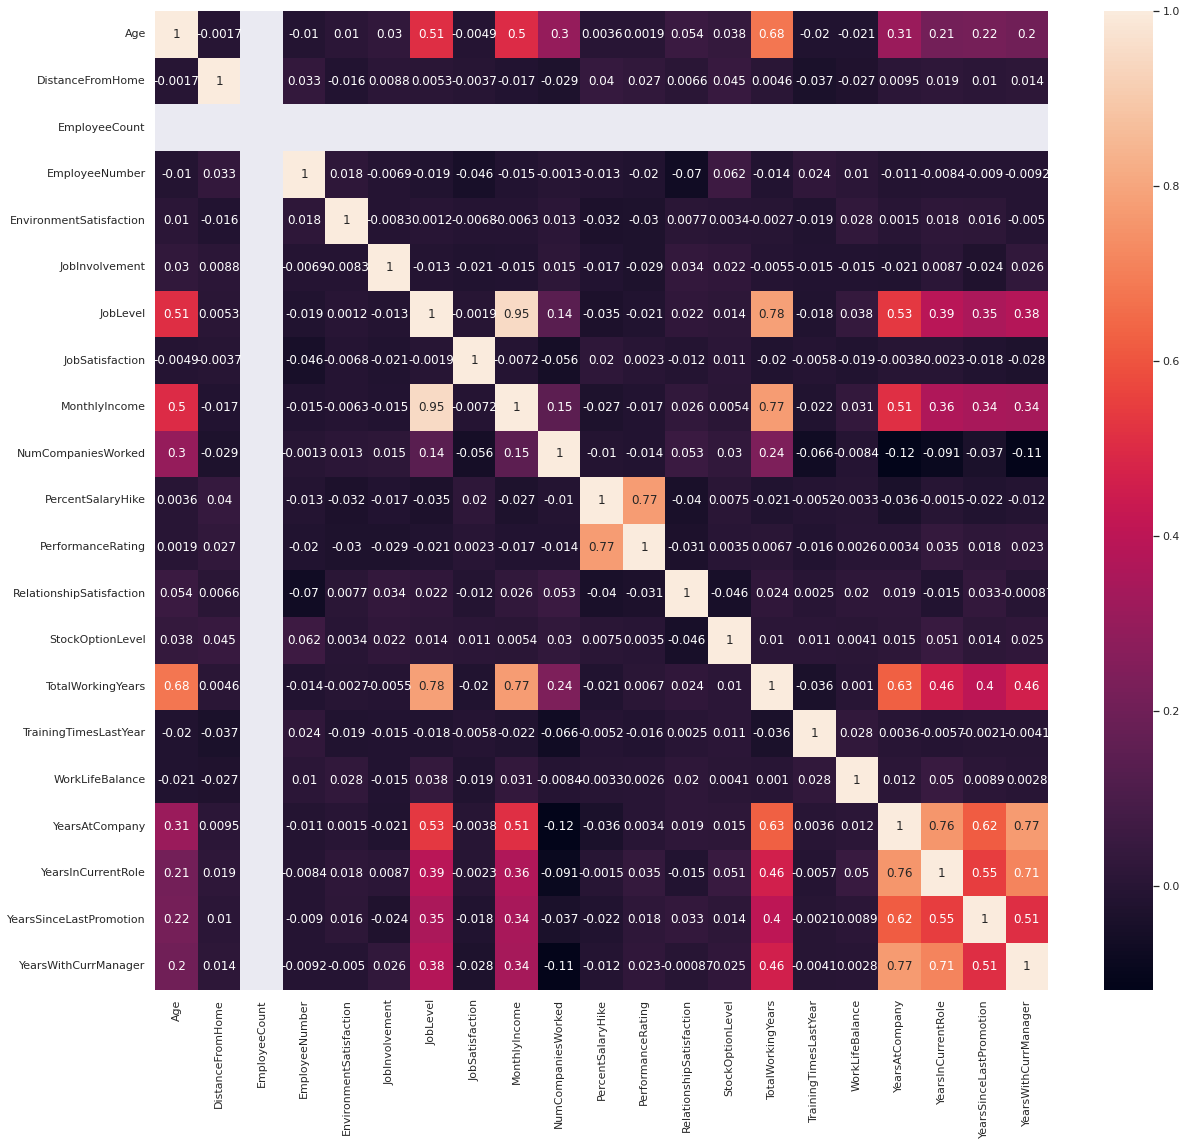

In [80]:
fig = plt.figure(figsize=(20,18))
sns.heatmap(raw.corr(), annot=True)